In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
# Download the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Check the shape of the training data
print("Shape of training data:", train_data.shape)

Shape of training data: (60000, 28, 28)


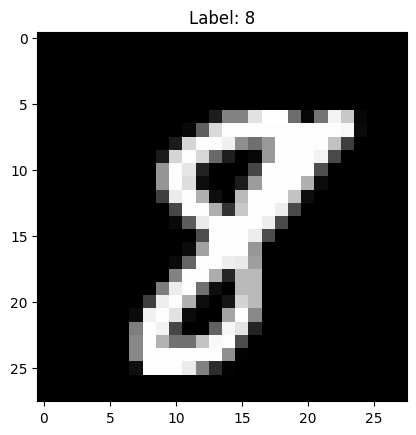

In [5]:
# Plot an example image and label
plt.imshow(train_data[55], cmap='gray')
plt.title("Label: " + str(train_labels[55]))
plt.show()

In [6]:
# Normalize and reshape the data
x_train = train_data.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = test_data.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

In [7]:
# One-hot encode the labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 11s 12ms/step - loss: 0.1818 - accuracy: 0.9454 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 2/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0341 - val_accuracy: 0.9892
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0287 - val_accuracy: 0.9909


In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9909
Test accuracy: 0.9908999800682068


In [13]:
# Load a imgae
img_path = '../data/numbers/5.jpg'  # Path of image in our HD
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')


#convert the img in a array with numpy and processing
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize img
img_array = img_array.reshape((1, 28, 28, 1))  # Re-shape the image

# Make the prediction of image
predictions = model.predict(img_array)

1/1 [==============================] - 0s 49ms/step


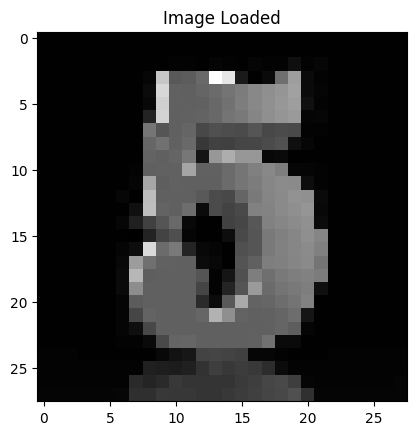

In [14]:
# Check the image send it to RNN
plt.imshow(img, cmap='gray')
plt.title("Image Loaded")
plt.show()

In [15]:
# Get the prediction of RNN
predicted_label = np.argmax(predictions)
print("The number is: " + str(predicted_label))

The number is: 5
